In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
# Funciones
def draw(vertices, edges, im):
    """Dibuja objeto definido por vertices y bordes"""
    # Normalizar coordenadas homogéneas
    v_h = np.array([v[:-1] / v[-1] for v in vertices])  # Eliminar la última columna homogénea
    for e in edges:
        pt1 = tuple(v_h[e[0], :2].astype(int))  # Coordenadas del primer vértice del borde
        pt2 = tuple(v_h[e[1], :2].astype(int))  # Coordenadas del segundo vértice del borde
        cv.line(im, pt1, pt2, (255, 0, 15), 2)  # Dibujar la línea entre los dos puntos
    for v in v_h:
        cv.circle(im, tuple(v.astype(int)[:2]), 3, (255, 0, 255), -1)  # Dibujar un círculo en cada vértice

In [ ]:
def translate3d(vertices, dx, dy, dz):
    """Operación de traslación 3d"""
    translation_matrix = np.array([[1, 0, 0, dx],
                                   [0, 1, 0, dy],
                                   [0, 0, 1, dz],
                                   [0, 0, 0, 1]])
    return np.dot(vertices, translation_matrix.T)

In [ ]:
def project2D(vertices, f=35, w=100, h=100):
    """Aplica una transformacion de proyeccion pinhole"""
    # Eliminar la última columna de la matriz de vértices (la columna homogénea)
    vertices_3d = vertices[:, :-1]
    # Definir la matriz de proyección
    projection_matrix = np.array([[f, 0, w/2],
                                   [0, f, h/2],
                                   [0, 0, 1]])
    # Realizar la multiplicación de matrices
    return np.dot(vertices_3d, projection_matrix.T)

In [ ]:
### ---------- DEFINIR GEOMETRIA  ---------- ###
# Cubo definido en su sistema coordenado
# Lista de vertices [[x, y, z,1], ...
# List de bordes que relacionan los indices de los vertices
# [(0,1), (1,2), ....
v = np.array([[0,100,100,1],[0,100,0,1],[100,100,0,1],[100,0,0,1],[100,0,100,1],[0,0,100,1],[0,0,0,1],[100,100,100,1]])
edges = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,0),(5,6),(1,6),(6,3),(7,4),(0,7),(7,2)]

In [ ]:
### ---------- TRASLADAR CUBO A POSICION INDICADA ---------- ###
v = translate3d(v, dx=50, dy=50, dz=50)

In [ ]:
# Parametros camara
f = 200 # Distancia focal
# Tamano imagen
w = 500
h = 500

In [ ]:
### ---------- PROYECTAR VERTICES ---------- ###
# Proyectar 3D -> 2D
vp = project2D(v, f, w, h)

In [ ]:
###----------  TRASLADAR PROYECCION A CENTRO DE IMAGEN ---------- ###
vp[:, :2] += np.array([w/2, h/2])

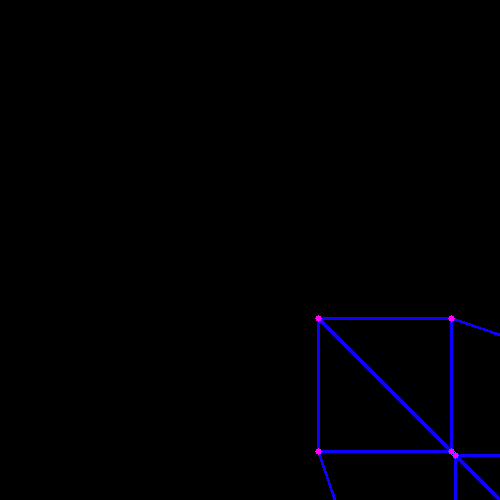

In [ ]:
# Dibujar y mostrar
im = np.zeros((h,w,3), np.uint8)
draw(vp, edges, im)
cv2_imshow(im)